# Part II - (Ford GoBike system Exploration)
## by (Anjela M. Andeo)



## Investigation Overview


> In this analysis, I wanted to look at how the duration of trips varies depending the type of user, gender days of the week and age 
 


## Dataset Overview

> The dataset contains 183412 fordgobike trips with the following 14 specifications: duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, bike id, user type and bike share for all trip.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar 
import datetime
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Drop rows whose columns have missing values
bike = bike.dropna(subset = ['member_gender', 'start_station_id', 'end_station_id'])

#change trip duration variable from second to minute
bike['duration_min'] = bike['duration_sec'] / 60

#Converting time from string to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['start_month_num'] =bike['start_time'].apply(lambda time: time.month)
bike['start_month_char'] = bike['start_month_num'].apply(lambda x: calendar.month_abbr[x])
bike['start_hour'] = bike["start_time"].dt.hour

#Convert day column to ordinal category
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                    'Sunday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = days_of_week)
bike['day'] = bike['start_time'].dt.day_name()
bike['day'] = bike['day'].astype(ordered_var)

this_year = 2022
bike['age'] = this_year - bike['member_birth_year']

## Gender against trip

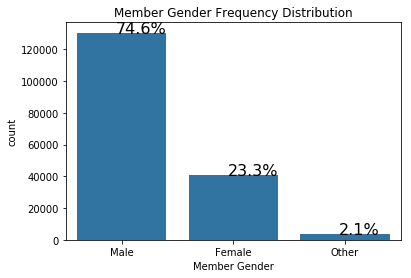

In [4]:
ax = sns.countplot(data = bike, x = 'member_gender',  color=sns.color_palette()[0], order=bike.member_gender.value_counts().index)
    
total = len(bike)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 16)
plt.xlabel('Member Gender')
plt.title('Member Gender Frequency Distribution');

Men make more bike trips (74.6%) while the other gender makes the least number of trips at 2.1%

## Day of the week against trip 

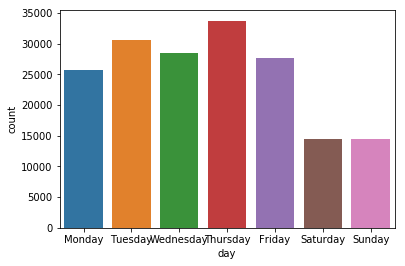

In [5]:
sns.countplot(data=bike, x='day')
plt.show()

Most trips are taken on Thursday, Tuesday, Wednesday, Friday and Monday consecutively. Saturday and Sunday have the least trips.

## User type frequency



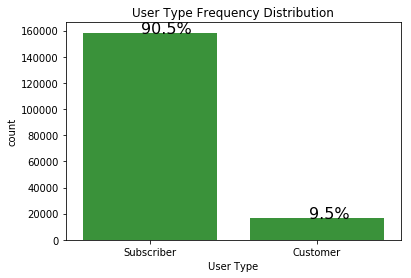

In [6]:
base_color = sns.color_palette()[2]
ax = sns.countplot(data = bike, x = 'user_type',  color= base_color, order=bike.user_type.value_counts().index)
    
total = len(bike)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 16)
plt.xlabel('User Type')
plt.title('User Type Frequency Distribution');

Subscribers make up majority of the bike users with 90.5% percentage while the number of frequent customers is a 9.5%

## Age against trips

Text(0.5,0,'Age (years)')

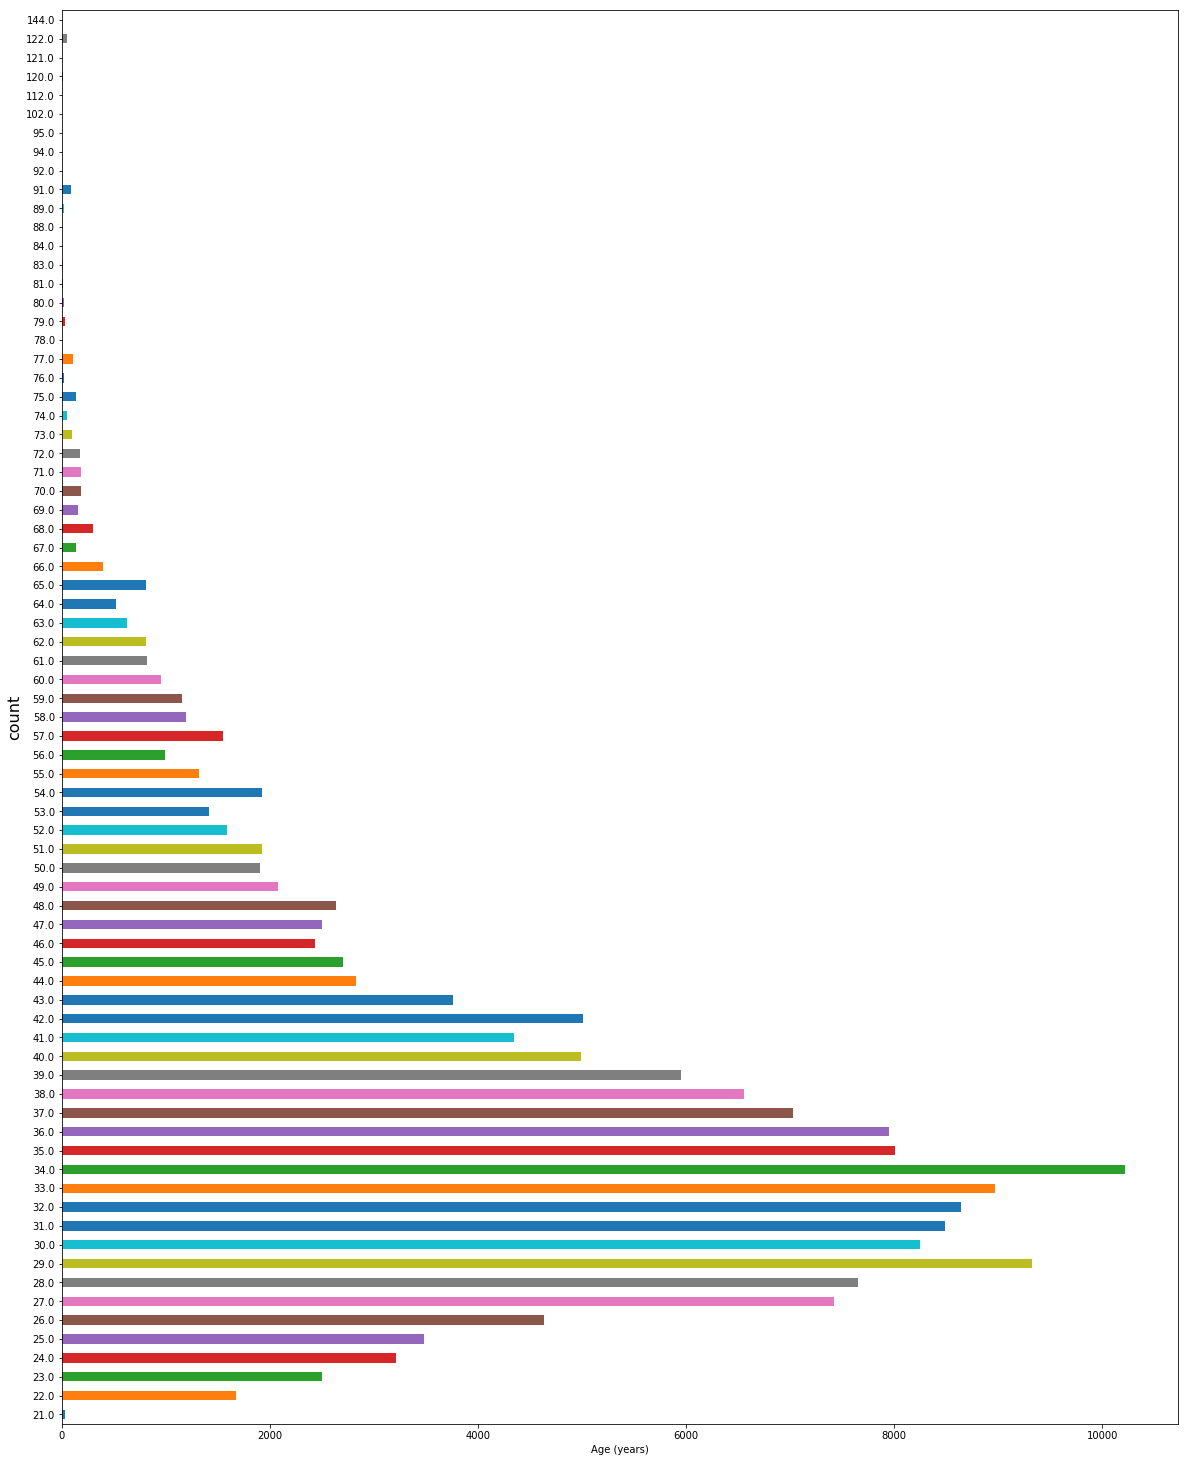

In [7]:
plt.figure(figsize=[20,26])
bike.age.value_counts().sort_index().plot(kind='barh')
plt.yticks(fontsize=10)
plt.ylabel('count',fontsize=16)
plt.xlabel('Age (years)')

Passengers between age 27 and 36 are higher in number

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 385319 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
